In [17]:
from data import *
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
#initialize Linear Regression model 
lr = LinearRegression()

In [19]:
#fit data to model
model = lr.fit(X_train, y_train)

In [20]:
#run test data through Model and test outputs equal to y_pred
y_pred = model.predict(X_test)

In [21]:
style.use('ggplot')

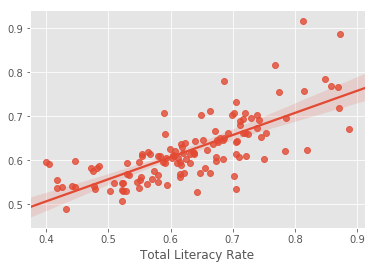

In [22]:
sns.regplot(y_test, y_pred)

In [23]:
#model score (R^2 and Adjusted R2)
r2 = model.score(X_test, y_test)
ar2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [24]:
#print R^2, Adjusted R^2, MSE, RMSE, and Normalized RMSE
print('R2:', r2, 'AdjustR2:', ar2)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Normalized RMSE:',np.sqrt(mean_squared_error(y_test, y_pred))/ y_test.std())

R2: 0.544041188955985 AdjustR2: 0.509264669469577
MSE: 0.005344285809250289
RMSE: 0.07310462235214876
Normalized RMSE: 0.6726043657550356


In [25]:
#Initial cross validation scores for basic linear regression model
cv_5_results = np.mean((cross_val_score(model, features, target, cv=kfold5)))
cv_10_results = np.mean((cross_val_score(model, features, target, cv=kfold10)))
cv_20_results = np.mean((cross_val_score(model, features, target, cv=kfold20)))

NameError: name 'cross_val_score' is not defined